In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [5]:
# Reflect Tables into SQLAlchemy ORM
#Python SQL toolkit and ORM
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# Reflect an existing databse into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session from Python to the database in order to query the database
session = Session(engine)

Exploratory Climate Analysis

In [23]:
# Display the Measurement row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x236ea432588>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [27]:
#Display the Measurement 
#all_rows = session.query(Measurement).all()
#for record in all_rows:
#    print(record.__dict__)

In [28]:
# Display the Station row's columns and data in dictionary format
first_station_row = session.query(Station).first()
first_station_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x236ea440160>,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716}

In [29]:
# Get the latest date from Measurement
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest_date)

('2017-08-23',)


In [30]:
#Get the date 12 months ago from latest date
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [32]:
# Design a query to retrieve the last 12 months of precipatation data and plot results
#for row in session.query(Measurement.date, Measurement.prcp).all():
    #print(row)
prcp_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

#for year in prcp_year:
#    print("Date: {0}, Precip: {1}".format(year.date, year.prcp))


In [56]:
# Load query results into DataFrame and set index to the date
m_df = pd.DataFrame(prcp_year, columns=['Date', 'Precip'])
m_df.set_index('Date', inplace=True)
m_df.head(20)

,Precip
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


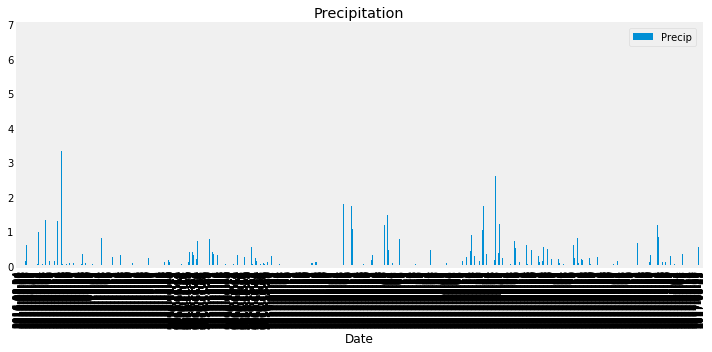

In [54]:
# Plot the dataframe as bar chart
m_df.iloc[:,:].plot.bar(figsize=(10,5), title = "Precipitation")
plt.grid()
plt.tight_layout()
plt.show()

In [61]:
# Use Pandas to calculate the summary statistics for the precipitation data for 2010 thru 2017
all_prcp = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date).all()
# Create DataFrame
all_prcp_df = pd.DataFrame(all_prcp, columns=['Date', 'Precip'])
#all_prcp_df.set_index('Date', inplace=True)

#all_prcp_df.head(20)
# Display the summary statistics for preciptation data
all_prcp_df.describe()

,Precip
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000
